
# We load the dataset and examine the first 5 records.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv('SUSY.csv.gz', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [2]:

print(df.values.shape)

(5000000, 19)


# Histograms



                  0
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


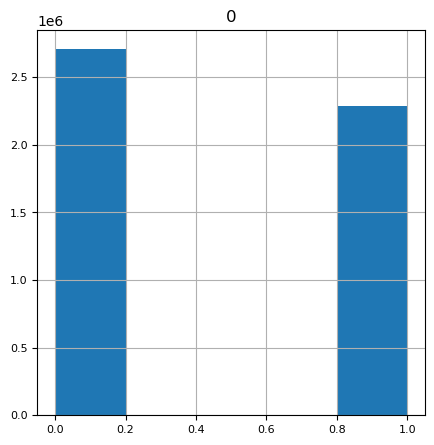

In [3]:

print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

                 1             2             3             4             5   \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean   1.000318e+00  2.192580e-05 -4.994657e-05  9.994304e-01 -3.713140e-05   
std    6.873341e-01  1.003107e+00  1.001670e+00  6.542200e-01  1.002839e+00   
min    2.548815e-01 -2.102927e+00 -1.734789e+00  4.285860e-01 -2.059306e+00   
25%    5.624837e-01 -7.573512e-01 -8.673567e-01  5.969881e-01 -7.695916e-01   
50%    7.915511e-01  1.342127e-04 -3.880155e-04  7.997993e-01 -3.793710e-04   
75%    1.204413e+00  7.576486e-01  8.670981e-01  1.162353e+00  7.692296e-01   
max    2.055345e+01  2.101605e+00  1.734839e+00  3.303562e+01  2.059721e+00   

                 6             7             8             9             10  \
count  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06  5.000000e+06   
mean  -1.972243e-05  9.999744e-01  3.542352e-05  1.001437e+00 -4.878472e-05   
std    1.001631e+00  8.728877e-01  1.001654e+00  8.

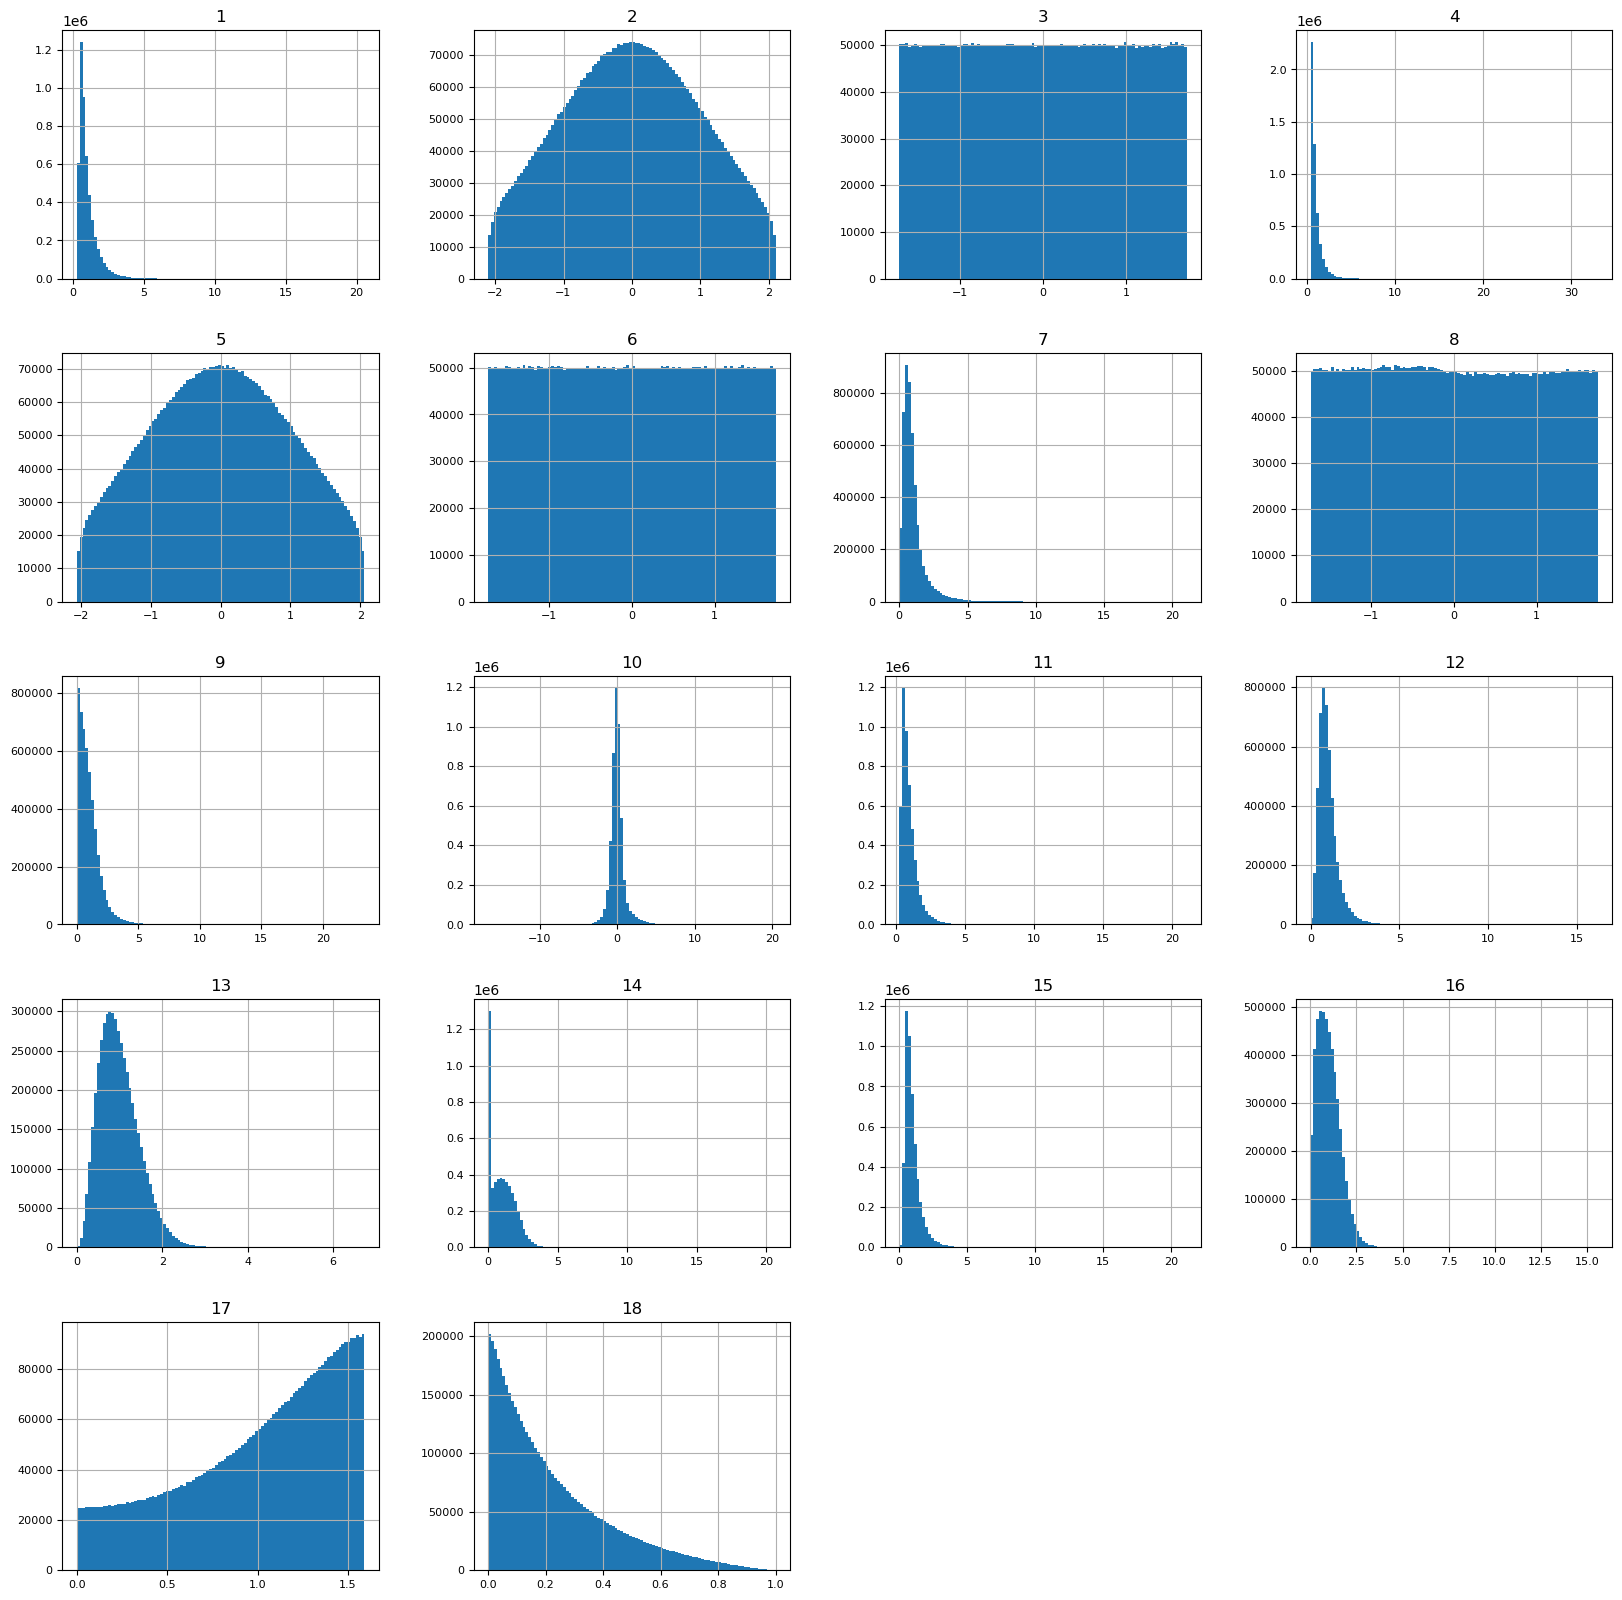

In [4]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

# Box plot to identify outliers



In [5]:
print(df[[3,6,8]].describe())

                  3             6             8
count  5.000000e+06  5.000000e+06  5.000000e+06
mean  -4.994657e-05 -1.972243e-05  3.542352e-05
std    1.001670e+00  1.001631e+00  1.001654e+00
min   -1.734789e+00 -1.734202e+00 -1.727117e+00
25%   -8.673567e-01 -8.683741e-01 -8.661510e-01
50%   -3.880155e-04  2.006134e-04 -9.172642e-03
75%    8.670981e-01  8.674778e-01  8.687620e-01
max    1.734839e+00  1.734686e+00  1.740689e+00


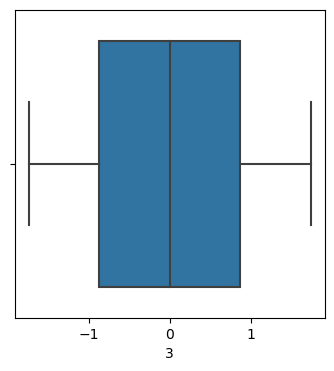

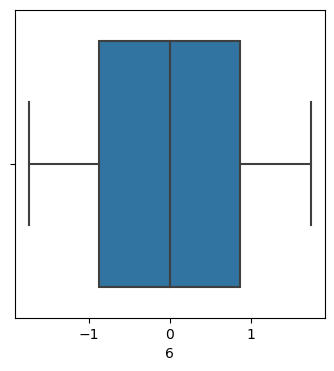

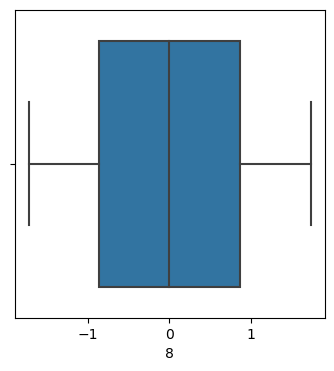

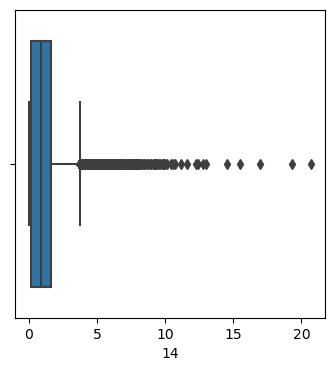

In [6]:
import warnings
warnings.filterwarnings("ignore")

for i in [3,6,8, 14]:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[i], orient='V')

#  correlation of different features

In [7]:
df_corr = df.corr()[[0]][1:19]
print(df_corr.sort_values(by=0,ascending=False))


           0
7   0.438821
12  0.423030
1   0.387397
9   0.282778
16  0.272992
18  0.268780
11  0.266589
15  0.258326
4   0.194794
13  0.111937
14  0.079421
10  0.077078
17  0.032656
5   0.000380
8   0.000110
6  -0.000099
2  -0.000328
3  -0.000462


# Scatter Plots of labels vs feature values to identify non-linear relationship

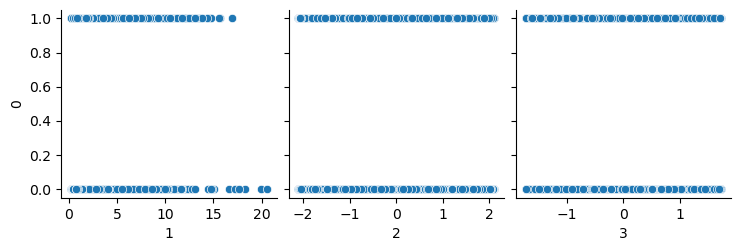

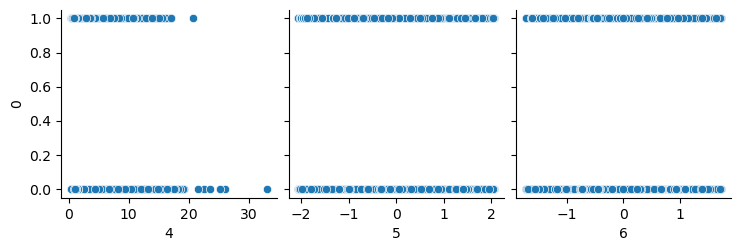

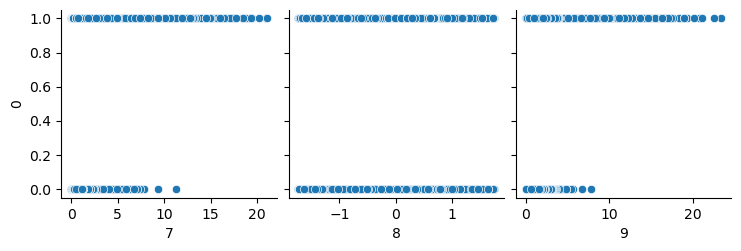

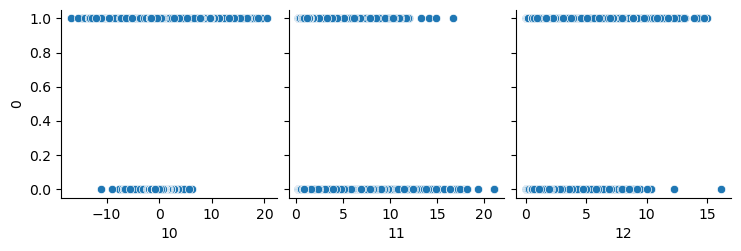

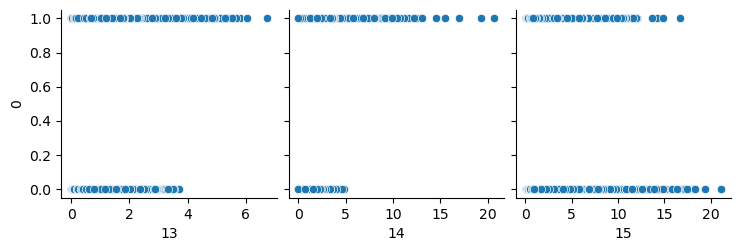

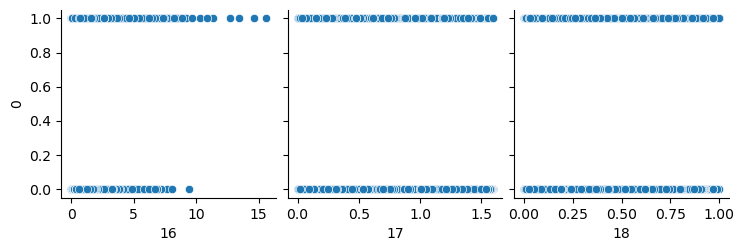

In [8]:

for i in range(1, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=[0])

#  Correlation Matrix 

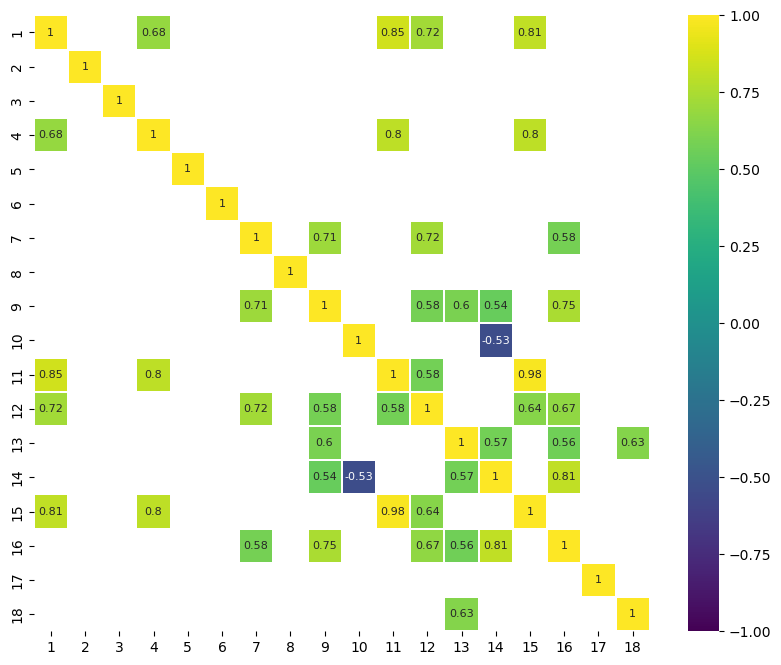

In [9]:

corr = df.drop(0, axis=1).corr() # We already examined Label correlations
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# PCA - Reduction of Dimensionality

[ 26.4  46.3  54.3  61.7  68.6  74.3  79.7  84.4  87.9  91.1  94.2  95.9
  97.1  98.1  98.9  99.5  99.9 100.1]


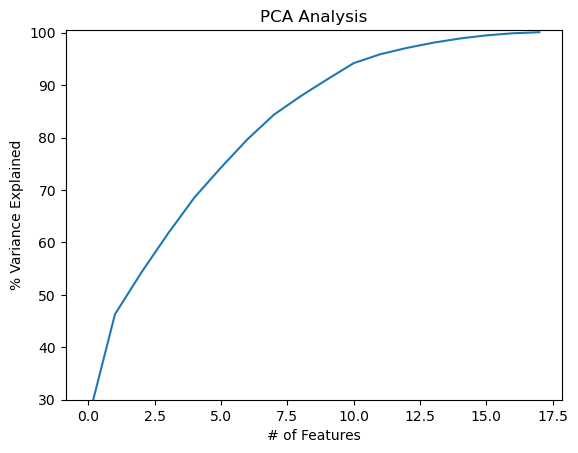

In [10]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df.drop(0))
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 18)
covar_matrix.fit(df_scaled)
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

# Clustering : Except K-Means and SOM; Other options we tried were too mcuh time-consuming to perform. E.g: Gaussian Mixture & DBSCAN

# Clustering using K-Means algorithm

### Elbow Method to find out optimal value of k

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


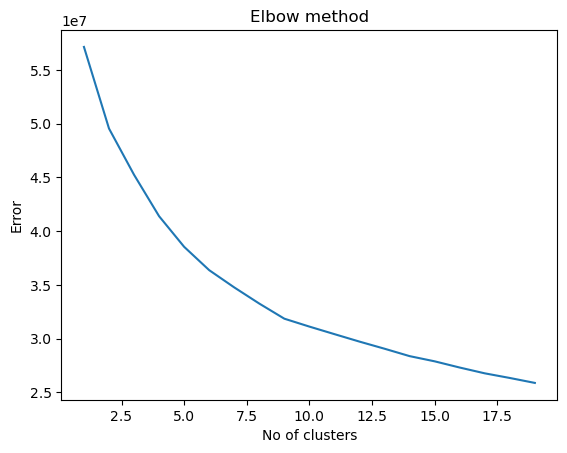

In [11]:

from sklearn.cluster import KMeans
Error =[]
for i in range(1, 20):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(df.drop(0))
    Error.append(kmeans.inertia_)
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Clustering using SOM

In [22]:
from minisom import MiniSom
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = pd.read_csv('SUSY.csv.gz', header=None)
data.head()
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
#                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
#                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], usecols=[0, 5], 
#                   sep='\t+', engine='python')
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 


 quantization error: 3.7524808767945492


In [23]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

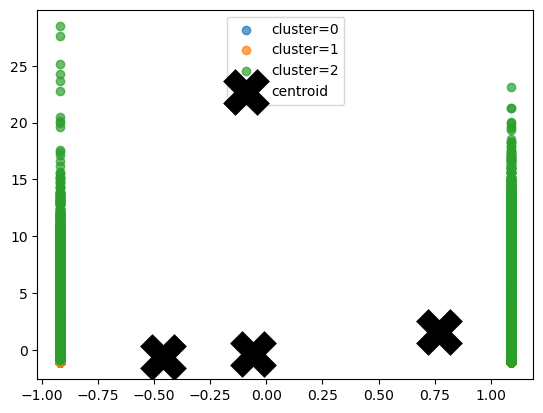

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

The number of clusters obtained seems very inconsistent though!

## Another Minisom Clustering

In [6]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps

from minisom import MiniSom

In [7]:
# Loading Data

data = pd.read_csv('SUSY.csv.gz')

# X 

data

# Shape of the data:

data.shape

# Info of the data:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999999 entries, 0 to 4999998
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   0.000000000000000000e+00   float64
 1   9.728614687919616699e-01   float64
 2   6.538545489311218262e-01   float64
 3   1.176224589347839355e+00   float64
 4   1.157156467437744141e+00   float64
 5   -1.739873170852661133e+00  float64
 6   -8.743090629577636719e-01  float64
 7   5.677649974822998047e-01   float64
 8   -1.750000417232513428e-01  float64
 9   8.100607395172119141e-01   float64
 10  -2.525521218776702881e-01  float64
 11  1.921887040138244629e+00   float64
 12  8.896374106407165527e-01   float64
 13  4.107718467712402344e-01   float64
 14  1.145620822906494141e+00   float64
 15  1.932632088661193848e+00   float64
 16  9.944640994071960449e-01   float64
 17  1.367815494537353516e+00   float64
 18  4.071449860930442810e-02   float64
dtypes: float64(19)
memory usage: 724.8 MB


In [8]:
# Defining X variables for the input of SOM
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928
1,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535
2,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217
3,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563
4,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999994,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084
4999995,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730
4999996,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236
4999997,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.069615,0.515424,0.146879,0.002377,0.417663,0.982085,0.164947,0.146485,0.000554,0.550812,0.037421,0.035075,0.071314
1,0.009358,0.468216,0.295368,0.000709,0.108141,0.278343,0.057890,0.643387,0.078304,0.437752,0.012446,0.058177,0.235614
2,0.006226,0.267992,0.699770,0.000625,0.716446,0.304672,0.096485,0.940121,0.130258,0.422328,0.014517,0.062736,0.234824
3,0.051980,0.336027,0.305084,0.035597,0.331627,0.679500,0.051608,0.387962,0.025194,0.486047,0.043828,0.059829,0.107965
4,0.009928,0.761630,0.935905,0.009912,0.655075,0.285967,0.015300,0.878991,0.007248,0.459021,0.010666,0.025679,0.111868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999994,0.029482,0.271408,0.071337,0.007655,0.619779,0.975001,0.087505,0.577908,0.043833,0.409393,0.030063,0.104133,0.248476
4999995,0.034323,0.533305,0.914125,0.013858,0.414505,0.286360,0.013793,0.286855,0.000058,0.456274,0.025738,0.033669,0.089266
4999996,0.028845,0.837689,0.148726,0.023524,0.911611,0.691276,0.023287,0.351211,0.030115,0.450576,0.026802,0.044693,0.115347
4999997,0.075342,0.301903,0.338566,0.016093,0.332685,0.088204,0.126275,0.249660,0.090518,0.527455,0.046377,0.058853,0.101617


In [10]:
# Set the hyper parameters
som_grid_rows = 100
som_grid_columns = 100
iterations = 20000
sigma = 1
learning_rate = 0.5

In [11]:
#define SOM:

som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights

som.random_weights_init(X)

# Training

som.train_random(X, iterations)

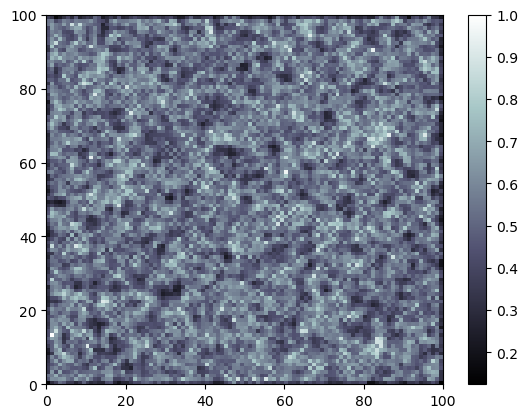

In [12]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()

Too Time Consuming

## Using SUSI module for clustering data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix
data = pd.read_csv('SUSY.csv.gz')
som = susi.SOMClustering(
    n_rows=30,
    n_columns=30
)
som.fit(data)

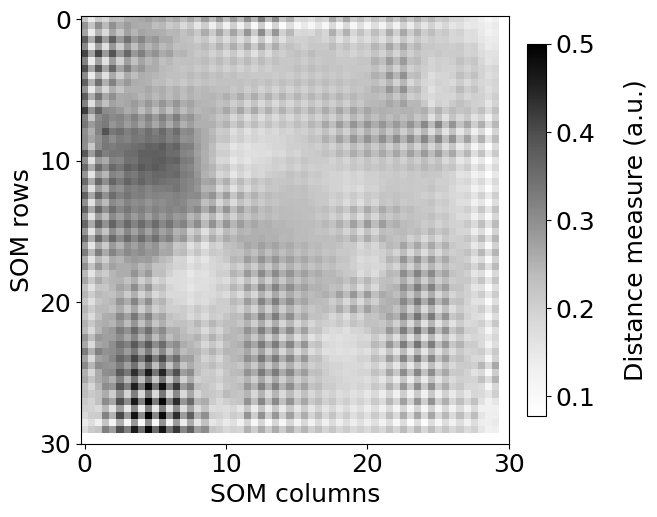

In [5]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 30, 30)
plt.show()

It seems that almost 10 true clusters exists within the data, which is close to the result obtained from k-means

# CLASSIFICATION

# After successful clustering we use some algorithms to investigate the SUSY dataset.

# Preparing the Dataset

In [57]:
from sklearn.utils import shuffle

X = df.values[:,1:]
y = df.values[:,0]

#we shuffle the dataset as follows:
X, y = shuffle(X, y)

# Decision Tree with Pruning


In [58]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Training accuracy:", clf.score(X_train, y_train))
print("Testing accuracy:", clf.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.7079


## Minimum Cost Complexity Pruning


In [59]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

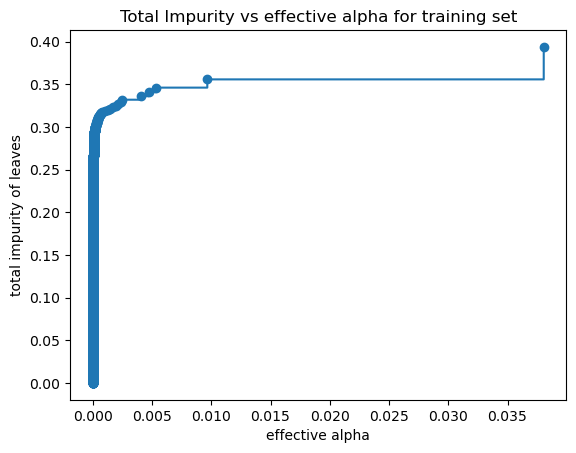

In [60]:

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [61]:

clfs = []

ccp_alphas = np.linspace(0.00005, 0.001, 10)
print(ccp_alphas.shape)
for ccp_alpha in ccp_alphas:
    print("Training with value: ", ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


(10,)
Training with value:  5e-05
Training with value:  0.00015555555555555556
Training with value:  0.0002611111111111111
Training with value:  0.00036666666666666667
Training with value:  0.00047222222222222224
Training with value:  0.0005777777777777778
Training with value:  0.0006833333333333333
Training with value:  0.0007888888888888889
Training with value:  0.0008944444444444445
Training with value:  0.001


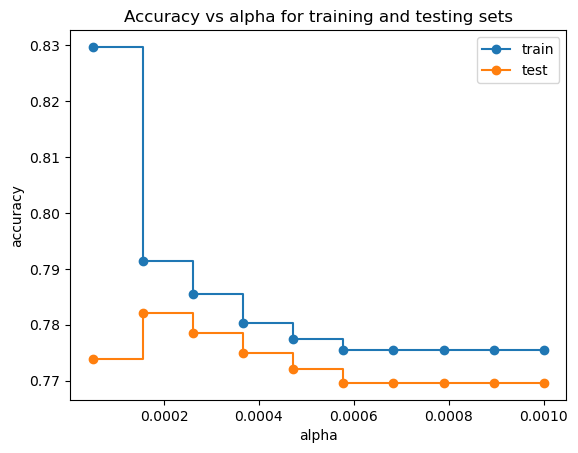

In [62]:

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
clf_final = DecisionTreeClassifier(random_state=0, ccp_alpha=1e-4)
clf_final.fit(X_train, y_train)
print("Training accuracy: ", clf_final.score(X_train, y_train))
print("Test accuracy: " , clf_final.score(X_test, y_test))

Training accuracy:  0.797025
Test accuracy:  0.782


# Random Forests Algorithm

In [64]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:1000000], y[:1000000], test_size=0.2, random_state=0)

#create a RandomForestClassifier with 5 estimators
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

print("Training done")
print("Training accuracy: ", clf.score(X_train, y_train))
print("Test set accuracy: ", clf.score(X_test, y_test))

Training done
Training accuracy:  0.97151
Test set accuracy:  0.76758


For depth =  2
Training done
Training accuracy:  0.74896375
Test set accuracy:  0.749855

For depth =  4
Training done
Training accuracy:  0.7612475
Test set accuracy:  0.760765

For depth =  6
Training done
Training accuracy:  0.78195625
Test set accuracy:  0.78226

For depth =  8
Training done
Training accuracy:  0.78920375
Test set accuracy:  0.788225

For depth =  10
Training done
Training accuracy:  0.7963725
Test set accuracy:  0.79246

For depth =  12
Training done
Training accuracy:  0.80450875
Test set accuracy:  0.79534

For depth =  14
Training done
Training accuracy:  0.819105
Test set accuracy:  0.79688

For depth =  16
Training done
Training accuracy:  0.834125
Test set accuracy:  0.79717

For depth =  18
Training done
Training accuracy:  0.86030875
Test set accuracy:  0.79537



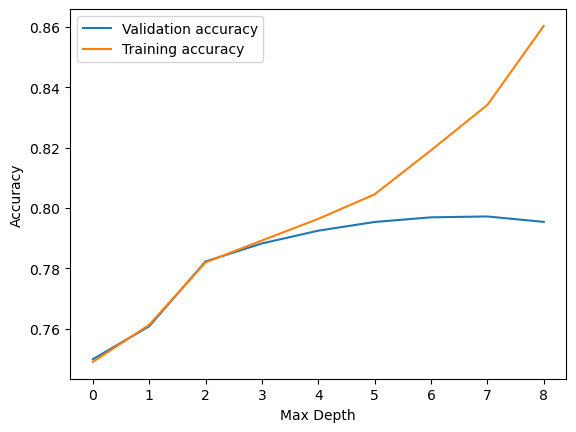

In [65]:

val_acc = []
tr_acc = []
for depth in range(2, 20, 2): 
  clf = RandomForestClassifier(n_estimators=10, max_depth = depth)
  clf.fit(X_train, y_train)
  print("For depth = ", str(depth))
  print("Training done")
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Test set accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(val_acc, label='Validation accuracy')
plt.plot(tr_acc, label='Training accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

# Naive Bayes


In [66]:
from sklearn.naive_bayes import GaussianNB

#we use the entire training data set, with a 20% split for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training Accuracy: ", gnb.score(X_train, y_train))
print("Testing Accuracy: ", gnb.score(X_test, y_test))

Training Accuracy:  0.73501475
Testing Accuracy:  0.735032


# K-Nearest Neighbours

Value of k:  10
Training accuracy:  0.7785
Validation accuracy:  0.765

Value of k:  12
Training accuracy:  0.76975
Validation accuracy:  0.7655

Value of k:  14
Training accuracy:  0.770625
Validation accuracy:  0.7695

Value of k:  16
Training accuracy:  0.7705
Validation accuracy:  0.7645

Value of k:  18
Training accuracy:  0.77
Validation accuracy:  0.7695

Value of k:  20
Training accuracy:  0.766875
Validation accuracy:  0.7705

Value of k:  22
Training accuracy:  0.763875
Validation accuracy:  0.7675

Value of k:  24
Training accuracy:  0.761875
Validation accuracy:  0.772

Value of k:  26
Training accuracy:  0.764125
Validation accuracy:  0.768

Value of k:  28
Training accuracy:  0.76225
Validation accuracy:  0.772



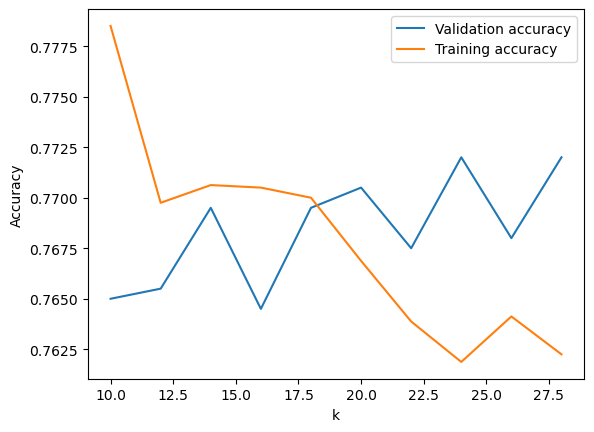

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=0)

val_acc = []
tr_acc = []

for k in range(10, 30, 2):
  clf = KNeighborsClassifier(k)
  clf.fit(X_train, y_train)
  print("Value of k: ", k)
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Validation accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(range(10, 30, 2), val_acc, label='Validation accuracy')
plt.plot(range(10, 30, 2), tr_acc, label='Training accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Bagging with Trees

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier 

X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=0)

val_acc = []
tr_acc = []

for n_estimators in range(10, 50, 10):
  bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.3, n_estimators=n_estimators).fit(X_train,y_train)
  print("Number of estimators ", n_estimators)
  val_acc.append(bagging.score(X_test, y_test))
  tr_acc.append(bagging.score(X_train, y_train))
  print("Training Accuracy: ", bagging.score(X_train, y_train))
  print("Testing Accuracy: ", bagging.score(X_test, y_test))
  

Number of estimators  10
Training Accuracy:  0.87155
Testing Accuracy:  0.7778
Number of estimators  20
Training Accuracy:  0.8841
Testing Accuracy:  0.78455
Number of estimators  30
Training Accuracy:  0.889175
Testing Accuracy:  0.78845
Number of estimators  40
Training Accuracy:  0.892425
Testing Accuracy:  0.78905


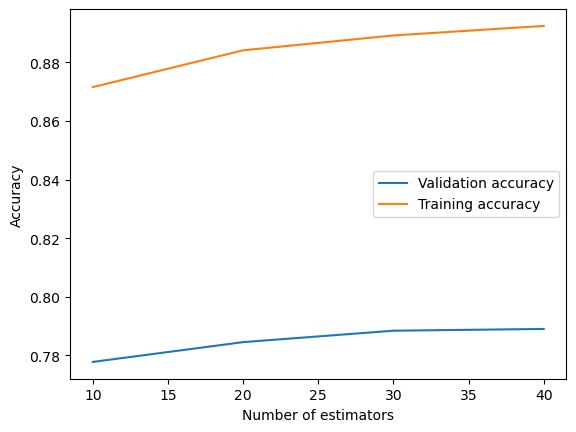

In [81]:

plt.plot(range(10, 50, 10), val_acc, label='Validation accuracy')
plt.plot(range(10, 50, 10), tr_acc, label='Training accuracy')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Results
We obtain the following results on each of the different classification techniques we used:

Decision tree with pruning: 78%

Random Forests: 79.8%

k-NN: 77.2%

Naive Bayes: 73%

Artificial Neural Networks: 80%

Bagging with Decision Trees: 79.6%

# APPENDIX.1

## In the follwing we tried some trials to build neural networks with different configurations to figure out if we can do the classification by NN. However, due to the process being too heavy for the system we interrupted the kernels almost after two hours and realized that the process is beyond the capability of my system, the very initial results seems very promising using this method. Thus,  one can expect great results using NNs. Yet, using them is unreasonable somehow because of the energy and Time required for processing.

# Importing the SUSY data set with Pandas and splitting 90-10 for training and testing.

In [85]:
# Importing the SUSY Data set
import sys, os
import pandas as pd

import numpy as np
import warnings
#Commnet the next line on to turn off warnings
#warnings.filterwarnings('ignore')


seed=12
np.random.seed(seed)
import tensorflow as tf
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.random.set_seed(seed)

# Download the SUSY.csv (about 2GB) from UCI ML archive and save it in the same directory as this jupyter notebook
# See: https://archive.ics.uci.edu/ml/machine-learning-databases/00279/
#filename="SUSY.csv"
path = "~/SUSY.csv.gz"
filename=full_path = os.path.expanduser(path)

columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

# Load 1,500,000 rows as train data, 50,000 as test data
df_train=pd.read_csv(filename,names=columns,nrows=1500000,engine='python')
df_test=pd.read_csv(filename,names=columns,nrows=50000, skiprows=1500000,engine='python')

# Run logistic regression using Linear Model functions

In [86]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
#import ml_style as style #optional styling sheet
#mpl.rcParams.update(style.style) #optional styling sheet

def getTrainData(nVar):
    designMatrix = df_train.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_train['signal'].values # labels (0 or 1)
    return (designMatrix,labels)

def getTestData(nVar):
    designMatrix = df_test.iloc[:,1:nVar+1].values
    #now the signal
    labels = df_test['signal'].values
    return (designMatrix,labels)

# define
def build_roc_curve(probs, signal_bit, threshes):
    # Convert things to a pandas series to build a DataFrame
    # which will make ROC curve logic easier to express
    signal_probs = pd.Series(probs[:,1])
    signal_true = pd.Series(signal_bit)
    signal_df = pd.DataFrame(signal_probs, columns=['sig_prob'])
    signal_df.loc[:,'sig_true'] = signal_true
    Acceptance = []
    Rejection = []
    for thresh in threshes:
        # define acceptance
        signal_df.loc[:,'accept'] = signal_df['sig_prob'] > thresh
        # sum over data frame with slicing conditions
        nSigCor = len(signal_df[(signal_df['accept']) & (signal_df['sig_true']==1.)])
        nSig = len(signal_df[signal_df['sig_true']==1.])
        nBkgCor = len(signal_df[ (signal_df['sig_true']==0.) & (~signal_df['accept'])])
        nBkg = len(signal_df[signal_df['sig_true']==0.])
        Acceptance.append(nSigCor/nSig) # False positive rate
        Rejection.append(nBkgCor/nBkg) # True positive rate

    return Acceptance, Rejection
    
# let's define this as a function so we can call it easily
def runTensorFlowRegression(nVar,alpha):

    #make data array placeholder for just first 8 simple features
    x = tf.placeholder(tf.float32,[None,nVar])
    #make weights and bias
    W = tf.Variable(tf.zeros([nVar,2])) #we will make y 'onehot' 0 bit is bkg, 1 bit is signal
    b = tf.Variable(tf.zeros([2]))

    #make 'answer variable'
    y = tf.nn.softmax(tf.matmul(x, W) + b)
    #placeholder for correct answer
    y_ = tf.placeholder(tf.float32, [None, 2])
    #cross entropy with L2 regularizer
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_)+alpha*tf.nn.l2_loss(W))
    
    #define training step
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    #initialize variables 
    init = tf.global_variables_initializer()
    #setup session
    sess = tf.Session()
    sess.run(init)

    #ok now everything is setup for tensorflow, but we need the data in a useful form
    #first let's get the variables
    Var_train, Sig_train_bit1 = getTrainData(nVar)
    #now the signal
    Sig_train_bit0 = Sig_train_bit1.copy()
    Sig_train_bit0 = 1 - Sig_train_bit0
    Sig_train = np.column_stack((Sig_train_bit0,Sig_train_bit1))
    
    ######## ------- TRAINING ----------############
    #Now perform minibatch gradient descent with minibatches of size 100:
    n_data = len(Sig_train_bit1)
    minibatch_size = 1000
    n_minibatch = n_data//minibatch_size
    print('\t Training with %i minibatches, dataset size is %i'%(n_minibatch,n_data))
    for i in range(0, n_minibatch):
        sys.stdout.write("%.3f %% completed \r"%(100*i/n_minibatch))
        sys.stdout.flush()
        start = i*minibatch_size
        end = (i+1)*minibatch_size-1
        
        batch_x = Var_train[start:end]
        batch_y = Sig_train[start:end]
        sess.run(train_step, feed_dict={x: batch_x, y_: batch_y})
    
    
    # Accuracy function:
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    ######## ------- TESTING ----------############
    # Setup test data
    Var_test = df_test.iloc[:,1:nVar+1].values
    
    # Now the signal
    Sig_test_bit1 = df_test['signal'].values
    
    Sig_test_bit0 = Sig_test_bit1.copy()
    Sig_test_bit0 = 1 - Sig_test_bit0
    Sig_test = np.column_stack((Sig_test_bit0,Sig_test_bit1))
    print("\t Accuracy for alpha %.1E : %.3f" %(alpha,sess.run(accuracy, feed_dict={x: Var_test, y_: Sig_test})))
    
    # Get the weights
    weights = W.eval(session=sess)
    # Get probabilities assigned (i.e. evaluate y on test data)
    probs = y.eval(feed_dict = {x: Var_test}, session = sess)
    # now let's get the signal efficiency and background rejection on the test data
    print('\t Computing ROC curve ...')
    # build ROC curve by scanning over thresholds of probability of being
    # a background event and calculating signal efficiency/background rejection
    # at each threshold
    threshes = np.arange(0,1,0.01)
    Acceptance, Rejection = build_roc_curve(probs, Sig_test_bit1, threshes)

    return (probs,Acceptance,Rejection)

### Training and evaluating model

In [91]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
alphas = np.logspace(-11,-12,1)
#fig = plt.figure()
#ax = fig.add_subplot(111)
it=0
for alpha in alphas:
    print("Training for alpha = %.2E"%alpha)
    c1 = 1.*( float(it) % 3.)/3.0
    c2 = 1.*( float(it) % 9.)/9.0
    c3 = 1.*( float(it) % 27.)/27.0
    probsSimple,accep,rej = runTensorFlowRegression(8,alpha)
    ax.scatter(accep,rej,c=[[c1,c2,c3]],label='Alpha: %.1E' %alpha)
    it+=1
  

Training for alpha = 1.00E-11
	 Training with 1500 minibatches, dataset size is 1500000
	 Accuracy for alpha 1.0E-11 : 0.770
	 Computing ROC curve ...


#### Although we did the running for a very small batch of training, we can see that Logistic regression will work good as a classification algorithm to distiguish signal versus background.

# Artificial Neural Network

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

neurons = [50, 100, 200, 300]
val_acc = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for hidden in neurons:
  model = Sequential([
      Dense(hidden, input_shape=(18,), activation='relu'),
      Dense(hidden, activation='relu'),
      Dense(hidden, activation = 'relu'),
      Dense(1),
      Activation('sigmoid'),
  ])

  adam = optimizers.Adam(lr=1e-3)

  model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5)
  scores = model.evaluate(X_test, y_test)
  val_acc.append(scores[1])

Epoch 1/10
640000/640000 [==============================] - 757s 1ms/step - loss: 0.4359 - accuracy: 0.7989 - val_loss: 0.4345 - val_accuracy: 0.7980
Epoch 2/10
342074/640000 [===============>..............] - ETA: 5:36 - loss: 0.4335 - accuracy: 0.8002

KeyboardInterrupt: 

The processing time for my system to perform Artificial Neural NEtwork was so much that I refused to compile fully the program. 

Indeed, the process was heavier than the capability of my system, sorry!

In [ ]:
hidden = 200
model = Sequential([
      Dense(hidden, input_shape=(18,), activation='sigmoid'),
      Dense(hidden, activation='sigmoid'),
      Dense(hidden, activation = 'sigmoid'),
      Dense(1),
      Activation('sigmoid'),
  ])

adam = optimizers.Adam(lr=1e-3)

model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=1024)
scores = model.evaluate(X_test, y_test)
print("Validation accuracy: ", scores[1])

Also , I liked to investigate the effect of Activation Functions on Neurons and the Neural Network, which is also time-consuming so I refuse to perform the code unfortunately.

#### As a Result it seems to me that performing an artificial neural network on this huge data is not really reasonable.

In [76]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

neurons = [2, 2]
val_acc = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for hidden in neurons:
  model = Sequential([
      Dense(hidden, input_shape=(18,), activation='relu'),
      Dense(1),
      Activation('sigmoid'),
  ])

  adam = optimizers.Adam(lr=1e-3)

  model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, y_train, validation_split=0.2, epochs=1, batch_size=1)
  scores = model.evaluate(X_test, y_test)
  val_acc.append(scores[1])

  43007/3200000 [..............................] - ETA: 55:03 - loss: 0.5068 - accuracy: 0.7489

KeyboardInterrupt: 

### Although we interrupted the kernel due to the processing being too much time-consuming.